<a href="https://colab.research.google.com/github/1995anas/Prediction_of_Product_Sales/blob/main/Resampling_Datetime_Data(Core).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Resampling Datetime Data(Core)
- Name: Anas Abu Alhaija

## Solution:

### Mount Drive

In [176]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Import and Load

In [177]:
import pandas  as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticks
import matplotlib.dates as mdates
import datetime as dt
fpath = "/content/drive/MyDrive/CodingDojo/04-DataViz/Week13/Data/london_weather.csv"
df = pd.read_csv(fpath)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              15341 non-null  int64  
 1   cloud_cover       15322 non-null  float64
 2   sunshine          15341 non-null  float64
 3   global_radiation  15322 non-null  float64
 4   max_temp          15335 non-null  float64
 5   mean_temp         15305 non-null  float64
 6   min_temp          15339 non-null  float64
 7   precipitation     15335 non-null  float64
 8   pressure          15337 non-null  float64
 9   snow_depth        13900 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 1.2 MB


,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,19790105,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0


### You must first load the data and create a datetime index.

1. Convert the date column to datetime dtype.
2. Set the date column as the index.

In [178]:
df['date'] = pd.to_datetime(df['date'],format = '%Y%m%d')
df = df.set_index('date')
df.head()

,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
date,,,,,,,,,
1979-01-01,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1979-01-02,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
1979-01-03,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
1979-01-04,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
1979-01-05,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0


3. Filter out only the required data:
  - Keep only data from the year 2000 or later.
  - Keep only the following features:
    - precipitation
    - mean_temp
    - min_temp
    - max_temp
    - snow_depth

In [179]:
df = df.loc['2000':,['precipitation','mean_temp','min_temp','max_temp','snow_depth'] ]
df

,precipitation,mean_temp,min_temp,max_temp,snow_depth
date,,,,,
2000-01-01,0.0,7.0,4.9,10.8,0.0
2000-01-02,0.2,7.9,5.0,11.5,0.0
2000-01-03,6.0,9.4,7.2,9.5,0.0
2000-01-04,0.2,7.0,4.4,11.0,0.0
2000-01-05,0.8,6.4,1.9,10.8,0.0
...,...,...,...,...,...
2020-12-27,2.0,7.5,7.6,7.5,NaN
2020-12-28,0.2,1.1,-1.3,3.6,NaN
2020-12-29,0.0,2.6,1.1,4.1,NaN


4. Impute any missing values.
  - Think about each feature and what imputation method makes sense. You may not be able to use the same method for every feature!

In [180]:
df.isna().sum()

precipitation       6
mean_temp          36
min_temp            2
max_temp            6
snow_depth       1441
dtype: int64

In [181]:
df['precipitation'] = df['precipitation'].interpolate()
df['mean_temp'] = df['mean_temp'].interpolate()
df['max_temp'] = df['max_temp'].interpolate()
df['min_temp'] = df['min_temp'].interpolate()
df['snow_depth'] = df['snow_depth'].interpolate()

In [182]:
df.isna().sum()

precipitation    0
mean_temp        0
min_temp         0
max_temp         0
snow_depth       0
dtype: int64

### Q1: What month had the most precipitation between 2000 through 2010?

1. make a new copy of the dataframe resampled to the correct frequency for the question.

In [183]:
precipitation = df['precipitation'].copy()
precipitation

date
2000-01-01    0.0
2000-01-02    0.2
2000-01-03    6.0
2000-01-04    0.2
2000-01-05    0.8
             ... 
2020-12-27    2.0
2020-12-28    0.2
2020-12-29    0.0
2020-12-30    0.0
2020-12-31    0.0
Name: precipitation, Length: 7671, dtype: float64

2. If there is a specific time period, plot only that time period.

In [184]:
precipitation = precipitation.loc['2000':'2010']
precipitation

date
2000-01-01    0.0
2000-01-02    0.2
2000-01-03    6.0
2000-01-04    0.2
2000-01-05    0.8
             ... 
2010-12-27    5.0
2010-12-28    0.4
2010-12-29    1.4
2010-12-30    0.0
2010-12-31    0.0
Name: precipitation, Length: 4018, dtype: float64

3. Resample the precipitation column to a Monthly frequency using .sum() as the aggregation method

In [185]:
precipitation_res = precipitation.resample("MS").sum()
precipitation_res.head()

date
2000-01-01    16.5
2000-02-01    62.2
2000-03-01    16.0
2000-04-01    99.6
2000-05-01    87.2
Freq: MS, Name: precipitation, dtype: float64

4. Find the date and corresponding value for the max precipitation.

In [198]:
max_pre = precipitation_res.idxmax()
max_pre

Timestamp('2000-10-01 00:00:00', freq='MS')

In [195]:
max_point = precipitation_res.loc[max_pre]
max_point

155.4

In [200]:
fmt = max_pre.strftime('%B %Y')
fmt

'October 2000'

5. Plot the feature and time period that corresponds to the question.
Make sure to meet the "Visualization Requirements" below!

6. Determine the date and value for the most precipitation (the max precipitation).
Add a vertical line at this date with a label that says the date (using date format: "April 2000") and the max precipitation value.

    - Make sure to add a legend so that your label is visible.

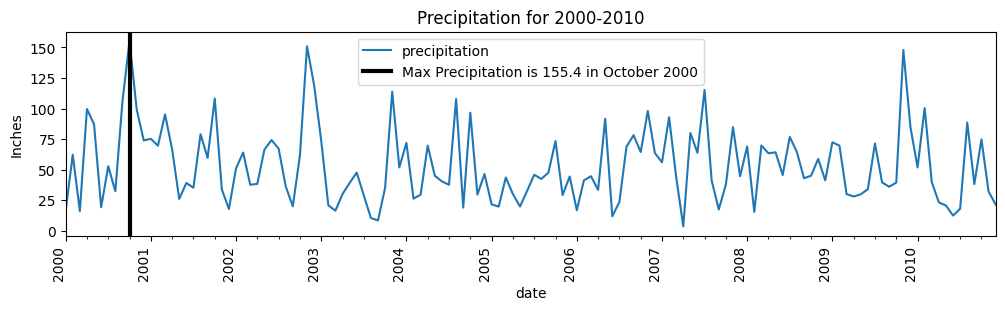

In [188]:
fig, ax = plt.subplots(figsize=(12,3))
precipitation_res.plot(ax=ax)
ax.axvline(max_pre,color='Black',lw=3, label =f'Max Precipitation is {max_point} in {fmt}')
ax.set(title='Precipitation for 2000-2010', ylabel='Inches')
fig.autofmt_xdate(which='major',rotation=90)
ax.legend();

### Q2: Which year between 2000-2020 had the coolest average temperature?

In [189]:
col_temp = df['mean_temp'].copy()
col_temp = col_temp.loc['2000':'2020']
col_temp

date
2000-01-01    7.0
2000-01-02    7.9
2000-01-03    9.4
2000-01-04    7.0
2000-01-05    6.4
             ... 
2020-12-27    7.5
2020-12-28    1.1
2020-12-29    2.6
2020-12-30    2.7
2020-12-31   -0.8
Name: mean_temp, Length: 7671, dtype: float64

1. Resample the  mean_temp data to a Yearly frequency using .mean() as the aggregation method.

In [190]:
col_temp_res = col_temp.resample('Y').mean()
col_temp_res.head()

date
2000-12-31    11.582514
2001-12-31    11.339452
2002-12-31    12.084384
2003-12-31    12.138356
2004-12-31    11.868579
Freq: A-DEC, Name: mean_temp, dtype: float64

2. Determine the year and value for the lowest mean temp.

In [194]:
col_temp_lowest = col_temp_res.idxmin()
lowest_year = col_temp_lowest.strftime('%Y')
lowest_year

'2010'

In [192]:
temp = col_temp_res.min().round(2)
temp

10.64

3. Add a vertical line at this date with a label that says the date (using date format: "2000") and the lowest mean temperature value.

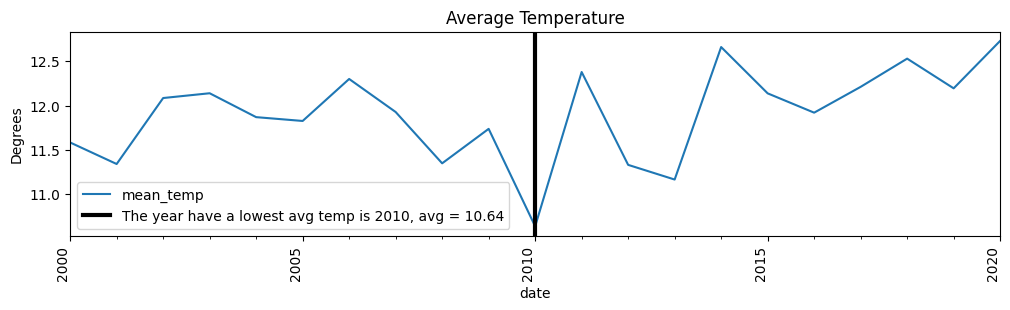

In [193]:
fig, ax = plt.subplots(figsize=(12,3))
col_temp_res.plot(ax=ax)
ax.axvline(col_temp_lowest,color='Black',lw=3, label =f'The year have a lowest avg temp is {lowest_year}, avg = {temp}')
ax.set(title='Average Temperature', ylabel='Degrees')
fig.autofmt_xdate(which='major',rotation=90)
ax.legend();